In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
"""
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
"""
import seaborn as sns
import cv2

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
"""
#data preprocess 2 -> sure: 18dk 5sn
#bu veriseti ile kıyaslama yapılmadı
import os
labels = ['dandelion', 'daisy','tulip','sunflower','rose']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
"""

In [ ]:
data = get_data("/content/drive/MyDrive/flowers")

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


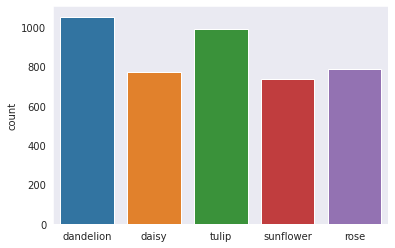

In [ ]:
l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('dark')
sns.countplot(l)

In [ ]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [ ]:
# Normalize the data
x = np.array(x) / 255
# Reshaping the data from 1-D to 3-D as required through input by CNN's 
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , stratify = y , random_state = 0)

In [2]:
#Data preprocess1

import numpy as np

import os

x_ = list()
y = list()
IMG_SIZE = 128
for i in os.listdir("/content/drive/MyDrive/flowers/daisy"):
    try:
        path = "/content/drive/MyDrive/flowers/daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("/content/drive/MyDrive/flowers/dandelion"):
    try:
        path = "/content/drive/MyDrive/flowers/dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("/content/drive/MyDrive/flowers/rose"):
    try:
        path = "/content/drive/MyDrive/flowers/rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None
for i in os.listdir("/content/drive/MyDrive/flowers/sunflower"):
    try:
        path = "/content/drive/MyDrive/flowers/sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
    except:
        None
for i in os.listdir("/content/drive/MyDrive/flowers/tulip"):
    try:
        path = "/content/drive/MyDrive/flowers/tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
    except:
        None
x_ = np.array(x_)


In [3]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [4]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 5)
print(y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [5]:
# test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

In [6]:
# validation and trains split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

In [6]:
# Train - Val - Test hali
print(x_train.shape)
#print(x_val.shape)
print(x_test.shape)

(3681, 128, 128, 3)
(650, 128, 128, 3)


CNN Model

In [9]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 4th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 5th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# Output layer
model.add(Dense(5,activation="softmax"))

#model.summary() 
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #compile model

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [11]:
epoch = 50 
batch_size = 64

In [13]:
#70 15 15 icin val acc: %72
#85 15 icin val acc: %76
history = model.fit(x_train,y_train,batch_size=64,
                              epochs= 20,validation_data=(x_test,y_test)
                              )

Epoch 1/20
58/58 [==============================] - 372s 6s/step - loss: 0.4955 - accuracy: 0.8131 - val_loss: 1.1799 - val_accuracy: 0.6185
Epoch 2/20
58/58 [==============================] - 382s 7s/step - loss: 0.4334 - accuracy: 0.8405 - val_loss: 0.8294 - val_accuracy: 0.6938
Epoch 3/20
58/58 [==============================] - 392s 7s/step - loss: 0.3164 - accuracy: 0.8854 - val_loss: 0.8281 - val_accuracy: 0.7277
Epoch 4/20
58/58 [==============================] - 390s 7s/step - loss: 0.2772 - accuracy: 0.9027 - val_loss: 0.7646 - val_accuracy: 0.7677
Epoch 5/20
58/58 [==============================] - 388s 7s/step - loss: 0.2559 - accuracy: 0.9112 - val_loss: 1.0469 - val_accuracy: 0.7185
Epoch 6/20
58/58 [==============================] - 388s 7s/step - loss: 0.2259 - accuracy: 0.9196 - val_loss: 0.8643 - val_accuracy: 0.7723
Epoch 7/20
58/58 [==============================] - 387s 7s/step - loss: 0.2168 - accuracy: 0.9242 - val_loss: 0.8322 - val_accuracy: 0.7769
Epoch 8/20
58

In [14]:
import pandas as pd
from sklearn.metrics import classification_report
target_names = ['dandelion', 'daisy','tulip','sunflower','rose']
y_pred_model1=model.predict(x_test)
y_pred_model1_le=np.argmax(y_pred_model1,axis=1)
rounded_labels=np.argmax(y_test, axis=1)
print(classification_report(rounded_labels, y_pred_model1_le, target_names=target_names))

              precision    recall  f1-score   support

   dandelion       0.70      0.80      0.75       122
       daisy       0.87      0.70      0.78       160
       tulip       0.68      0.69      0.69       121
   sunflower       0.82      0.89      0.86       111
        rose       0.78      0.79      0.78       136

    accuracy                           0.77       650
   macro avg       0.77      0.78      0.77       650
weighted avg       0.78      0.77      0.77       650



Pretrained CNN Models

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D
from keras import optimizers
from keras import models
#CNN Models
basemodelEfficientNetB3 = tf.keras.applications.EfficientNetB3(
    include_top=None,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=5
    )
basemodelInceptionV3= tf.keras.applications.InceptionV3(
    include_top=None,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=5
  )


87916544/87910968 [==============================] - 2s 0us/step


In [14]:
basemodelVGG19=tf.keras.applications.VGG19(
    include_top=None,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=5
)
basemodelVGG16=tf.keras.applications.VGG16(
    include_top=None,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=5
)
basemodelXception=tf.keras.applications.Xception(
    include_top=None,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=5
)
basemodelDenseNet121=tf.keras.applications.DenseNet121(
    include_top=None,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=5
)

29089792/29084464 [==============================] - 1s 0us/step


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

EfficientNetB3

In [ ]:
#Early Stopping Denemesi
# simple early stopping
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

x1=basemodelEfficientNetB3.output
x1=GlobalAveragePooling2D()(x1)
preds=Dense(5,activation='softmax')(x1) #softmax ile son katman
modelEfficientNetB3=tf.keras.Model(inputs=basemodelEfficientNetB3.input,outputs=preds)
modelEfficientNetB3.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(
                learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD'
                ),metrics=['accuracy',f1_m,precision_m, recall_m])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('/content/drive/MyDrive/Flower - CNN Models/best_model_efficientnet.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model

history = modelEfficientNetB3.fit(x_train,y_train, validation_data=(x_val,y_val),batch_size=64, epochs=50, verbose=0, callbacks=[es, mc])


In [ ]:
import tensorflow as tf
model_EfficientNetB3= tf.keras.models.load_model('/content/drive/MyDrive/Flower - CNN Models/best_model_efficientnet.h5',compile=False)
model_EfficientNetB3.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(
                learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD'
                ),metrics=['accuracy',f1_m,precision_m, recall_m])
model_EfficientNetB3.evaluate(x_test,y_test)

21/21 [==============================] - 4s 45ms/step - loss: 0.3209 - accuracy: 0.8808 - f1_m: 0.8811 - precision_m: 0.8998 - recall_m: 0.8637


[0.3248079717159271,
 0.8784615397453308,
 0.8809406757354736,
 0.9003602266311646,
 0.8627976179122925]

In [ ]:
# 85-15 veriseti icin %88 acc    -- 0.01 LR ve SGD optimizer , 64 BS, 50 epoch 10 patience 
# 70-15-15 veriseti icin %82 acc
y_pred_efficientnet=model_EfficientNetB3.predict(x_test)
y_pred_efficientnet_le=np.argmax(y_pred_efficientnet,axis=1)
rounded_labels=np.argmax(y_test, axis=1)
print(classification_report(rounded_labels, y_pred_efficientnet_le, target_names=target_names))

              precision    recall  f1-score   support

   dandelion       0.94      0.83      0.88       122
       daisy       0.88      0.94      0.91       160
       tulip       0.78      0.88      0.83       121
   sunflower       0.92      0.94      0.93       111
        rose       0.90      0.80      0.85       136

    accuracy                           0.88       650
   macro avg       0.88      0.88      0.88       650
weighted avg       0.88      0.88      0.88       650



In [ ]:
#EfficientNetB3 cm
from sklearn.metrics import confusion_matrix

confusion_matrix(rounded_labels, y_pred_efficientnet_le)

array([[101,  10,   4,   3,   4],
       [  5, 150,   3,   2,   0],
       [  2,   4, 107,   1,   7],
       [  0,   4,   2, 104,   1],
       [  0,   3,  21,   3, 109]])

InceptionV3

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
x2=basemodelInceptionV3.output
x2=GlobalAveragePooling2D()(x2)
preds2=Dense(5,activation='softmax')(x2) #softmax ile son katman
modelInceptionV3=tf.keras.Model(inputs=basemodelInceptionV3.input,outputs=preds2)
modelInceptionV3.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(
                learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD'
                ),metrics=['accuracy',f1_m,precision_m, recall_m])
es2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc2 = ModelCheckpoint('/content/drive/MyDrive/Flower - CNN Models/best_model_inceptionv3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history2 = modelInceptionV3.fit(x_train,y_train, validation_data=(x_val,y_val),batch_size=64, epochs=50, verbose=0, callbacks=[es2, mc2])

In [ ]:
import tensorflow as tf
model_InceptionV3= tf.keras.models.load_model('/content/drive/MyDrive/Flower - CNN Models/best_model_inceptionv3.h5',compile=False)
model_InceptionV3.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(
                learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD'
                ),metrics=['accuracy',f1_m,precision_m, recall_m])
model_InceptionV3.evaluate(x_test,y_test)

21/21 [==============================] - 4s 58ms/step - loss: 0.5035 - accuracy: 0.8369 - f1_m: 0.8413 - precision_m: 0.8688 - recall_m: 0.8162


[0.5275843143463135,
 0.8323076963424683,
 0.8436988592147827,
 0.8646903038024902,
 0.824404776096344]

In [ ]:
# InceptionV3 85-15 veriseti icin %83,23 acc  -- 0.01 LR ve SGD optimizer , 64 BS, 50 epoch 10 patience 
# 70-15-15 veriseti icin %79 acc
y_pred_inceptionv3=model_InceptionV3.predict(x_test)
y_pred_inceptionv3_le=np.argmax(y_pred_inceptionv3,axis=1) # ohe to le
rounded_labels=np.argmax(y_test, axis=1)
print(classification_report(rounded_labels, y_pred_inceptionv3_le, target_names=target_names))

              precision    recall  f1-score   support

   dandelion       0.89      0.80      0.84       122
       daisy       0.85      0.91      0.88       160
       tulip       0.79      0.73      0.76       121
   sunflower       0.89      0.88      0.89       111
        rose       0.76      0.82      0.79       136

    accuracy                           0.83       650
   macro avg       0.84      0.83      0.83       650
weighted avg       0.83      0.83      0.83       650



In [ ]:
#InceptionV3 cm
from sklearn.metrics import confusion_matrix

confusion_matrix(rounded_labels, y_pred_inceptionv3_le)

array([[ 98,  11,   2,   4,   7],
       [  5, 145,   5,   1,   4],
       [  4,   6,  88,   3,  20],
       [  1,   5,   2,  98,   5],
       [  2,   3,  15,   4, 112]])

VGG19

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
x3=basemodelVGG19.output
x3=GlobalAveragePooling2D()(x3)
preds3=Dense(5,activation='softmax')(x3) #softmax ile son katman
modelVGG19=tf.keras.Model(inputs=basemodelVGG19.input,outputs=preds3)
modelVGG19.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(
                learning_rate=0.001, momentum=0.0, nesterov=False, name='SGD'
                ),metrics=['accuracy',f1_m,precision_m, recall_m])
es3 = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc3 = ModelCheckpoint('/content/drive/MyDrive/Flower - CNN Models/best_model_vgg19.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history3 = modelVGG19.fit(x_train,y_train, validation_data=(x_val,y_val),batch_size=64, epochs=50, verbose=0, callbacks=[es3, mc3])

Epoch 1/50
49/49 [==============================] - 15s 247ms/step - loss: 2.6489 - accuracy: 0.3303 - f1_m: 0.1579 - precision_m: 0.4674 - recall_m: 0.1112 - val_loss: 1.2045 - val_accuracy: 0.5154 - val_f1_m: 0.3274 - val_precision_m: 0.7205 - val_recall_m: 0.2129

Epoch 00001: val_accuracy improved from -inf to 0.51537, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_vgg19.h5
Epoch 2/50
49/49 [==============================] - 8s 167ms/step - loss: 1.1449 - accuracy: 0.5332 - f1_m: 0.4142 - precision_m: 0.7156 - recall_m: 0.2978 - val_loss: 0.9110 - val_accuracy: 0.6365 - val_f1_m: 0.5769 - val_precision_m: 0.7491 - val_recall_m: 0.4699

Epoch 00002: val_accuracy improved from 0.51537 to 0.63653, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_vgg19.h5
Epoch 3/50
49/49 [==============================] - 8s 167ms/step - loss: 0.8542 - accuracy: 0.6609 - f1_m: 0.6370 - precision_m: 0.7791 - recall_m: 0.5414 - val_loss: 0.6750 - val_accuracy:

In [ ]:
import tensorflow as tf
model_VGG19= tf.keras.models.load_model('/content/drive/MyDrive/Flower - CNN Models/best_model_vgg19.h5',compile=False)
model_VGG19.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(
                learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD'
                ),metrics=['accuracy',f1_m,precision_m, recall_m])
model_VGG19.evaluate(x_test,y_test)

21/21 [==============================] - 5s 92ms/step - loss: 0.6831 - accuracy: 0.8174 - f1_m: 0.8243 - precision_m: 0.8354 - recall_m: 0.8137


[0.6317270994186401,
 0.8199999928474426,
 0.8294658660888672,
 0.8396281003952026,
 0.819940447807312]

In [ ]:
# VGG19 85-15 veriseti icin %82 acc
# 70-15-15 veriseti icin %79 acc
y_pred_vgg19=model_VGG19.predict(x_test)
y_pred_vgg19_le=np.argmax(y_pred_vgg19,axis=1) # ohe to le
rounded_labels=np.argmax(y_test, axis=1)
print(classification_report(rounded_labels, y_pred_vgg19_le, target_names=target_names))

              precision    recall  f1-score   support

   dandelion       0.84      0.80      0.82       122
       daisy       0.89      0.84      0.87       160
       tulip       0.73      0.88      0.79       121
   sunflower       0.83      0.86      0.85       111
        rose       0.82      0.73      0.77       136

    accuracy                           0.82       650
   macro avg       0.82      0.82      0.82       650
weighted avg       0.82      0.82      0.82       650



In [ ]:
#VGG19 cm
from sklearn.metrics import confusion_matrix

confusion_matrix(rounded_labels, y_pred_vgg19_le)

array([[ 97,  11,   4,   4,   6],
       [  8, 135,   5,   9,   3],
       [  5,   1, 106,   0,   9],
       [  5,   3,   3,  96,   4],
       [  1,   2,  28,   6,  99]])

VGG16

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
x4=basemodelVGG16.output
x4=GlobalAveragePooling2D()(x4)
preds4=Dense(5,activation='softmax')(x4) #softmax ile son katman
modelVGG16=tf.keras.Model(inputs=basemodelVGG16.input,outputs=preds4)
modelVGG16.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(
                learning_rate=0.001, momentum=0.0, nesterov=False, name='SGD'
                ),metrics=['accuracy',f1_m,precision_m, recall_m])
es4 = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc4 = ModelCheckpoint('/content/drive/MyDrive/Flower - CNN Models/best_model_vgg16.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history4 = modelVGG16.fit(x_train,y_train, validation_data=(x_val,y_val),batch_size=64, epochs=50, verbose=0, callbacks=[es4, mc4])


Epoch 00001: val_accuracy improved from -inf to 0.65280, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_vgg16.h5

Epoch 00002: val_accuracy improved from 0.65280 to 0.72514, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_vgg16.h5

Epoch 00003: val_accuracy improved from 0.72514 to 0.76673, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_vgg16.h5

Epoch 00004: val_accuracy improved from 0.76673 to 0.78662, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_vgg16.h5

Epoch 00005: val_accuracy improved from 0.78662 to 0.79385, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_vgg16.h5

Epoch 00006: val_accuracy improved from 0.79385 to 0.79747, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_vgg16.h5

Epoch 00007: val_accuracy improved from 0.79747 to 0.83725, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_vgg16.h5

Epoch 00008: val_accur

In [ ]:
import tensorflow as tf
model_VGG16= tf.keras.models.load_model('/content/drive/MyDrive/Flower - CNN Models/best_model_vgg16.h5',compile=False)
model_VGG16.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(
                learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD'
                ),metrics=['accuracy',f1_m,precision_m, recall_m])
model_VGG16.evaluate(x_test,y_test)

21/21 [==============================] - 1s 41ms/step - loss: 0.6969 - accuracy: 0.8081 - f1_m: 0.8136 - precision_m: 0.8194 - recall_m: 0.8082


[0.6214974522590637,
 0.8215384483337402,
 0.8315022587776184,
 0.8374199867248535,
 0.8258928656578064]

In [ ]:
# VGG16 85-15 veriseti icin %82,15 acc
# 70-15-15 veriseti icin %78 acc
y_pred_vgg16=model_VGG16.predict(x_test)
y_pred_vgg16_le=np.argmax(y_pred_vgg16,axis=1) # ohe to le
rounded_labels=np.argmax(y_test, axis=1)
print(classification_report(rounded_labels, y_pred_vgg16_le, target_names=target_names))

              precision    recall  f1-score   support

   dandelion       0.82      0.83      0.82       122
       daisy       0.86      0.90      0.88       160
       tulip       0.70      0.80      0.75       121
   sunflower       0.94      0.84      0.89       111
        rose       0.81      0.73      0.77       136

    accuracy                           0.82       650
   macro avg       0.83      0.82      0.82       650
weighted avg       0.83      0.82      0.82       650



In [ ]:
#VGG16 cm
from sklearn.metrics import confusion_matrix

confusion_matrix(rounded_labels, y_pred_vgg16_le)

array([[101,  11,   6,   0,   4],
       [  9, 144,   4,   1,   2],
       [  5,   7,  97,   0,  12],
       [  6,   6,   1,  93,   5],
       [  2,   0,  30,   5,  99]])

XCeption

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
x5=basemodelXception.output
x5=GlobalAveragePooling2D()(x5)
preds5=Dense(5,activation='softmax')(x5) #softmax ile son katman
modelXception=tf.keras.Model(inputs=basemodelXception.input,outputs=preds5)
modelXception.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(
                learning_rate=0.001, momentum=0.0, nesterov=False, name='SGD'
                ),metrics=['accuracy',f1_m,precision_m, recall_m])
es5 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc5 = ModelCheckpoint('/content/drive/MyDrive/Flower - CNN Models/best_model_xception.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history5 = modelXception.fit(x_train,y_train, validation_data=(x_val,y_val),batch_size=64, epochs=50, verbose=0, callbacks=[es5, mc5])


Epoch 00001: val_accuracy improved from -inf to 0.25316, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_xception.h5

Epoch 00002: val_accuracy improved from 0.25316 to 0.31465, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_xception.h5

Epoch 00003: val_accuracy improved from 0.31465 to 0.38698, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_xception.h5

Epoch 00004: val_accuracy improved from 0.38698 to 0.44304, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_xception.h5

Epoch 00005: val_accuracy improved from 0.44304 to 0.48825, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_xception.h5

Epoch 00006: val_accuracy improved from 0.48825 to 0.53526, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_xception.h5

Epoch 00007: val_accuracy improved from 0.53526 to 0.57143, saving model to /content/drive/MyDrive/Flower - CNN Models/best_model_xception.h5

E

In [ ]:
import tensorflow as tf
model_Xception= tf.keras.models.load_model('/content/drive/MyDrive/Flower - CNN Models/best_model_xception.h5',compile=False)
model_Xception.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(
                learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD'
                ),metrics=['accuracy',f1_m,precision_m, recall_m])
model_Xception.evaluate(x_test,y_test)

21/21 [==============================] - 3s 57ms/step - loss: 0.6809 - accuracy: 0.7814 - f1_m: 0.7130 - precision_m: 0.9295 - recall_m: 0.5821


[0.6712089776992798,
 0.7815384864807129,
 0.7277436256408691,
 0.9465160369873047,
 0.594345211982727]

In [ ]:
# Xception 85-15 veriseti icin %78,15 acc
# 70-15-15 veriseti icin %72 acc
y_pred_xception=model_Xception.predict(x_test)
y_pred_xception_le=np.argmax(y_pred_xception,axis=1) # ohe to le
rounded_labels=np.argmax(y_test, axis=1)
print(classification_report(rounded_labels, y_pred_xception_le, target_names=target_names))

              precision    recall  f1-score   support

   dandelion       0.95      0.61      0.75       122
       daisy       0.80      0.89      0.85       160
       tulip       0.75      0.75      0.75       121
   sunflower       0.81      0.76      0.78       111
        rose       0.68      0.85      0.76       136

    accuracy                           0.78       650
   macro avg       0.80      0.77      0.78       650
weighted avg       0.80      0.78      0.78       650



In [ ]:
#Xception cm
from sklearn.metrics import confusion_matrix

confusion_matrix(rounded_labels, y_pred_xception_le)

array([[ 75,  20,   7,   6,  14],
       [  0, 143,   3,   7,   7],
       [  3,   4,  91,   5,  18],
       [  1,   7,   5,  84,  14],
       [  0,   4,  15,   2, 115]])